<a href="https://colab.research.google.com/github/MaschinenNah/MachineLearningKochbuch03_LambdaSchichten/blob/main/Kantenerkennung_mit_Tensoren.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Kanten erkennen mit Tensoren


In [66]:
from keras.layers import Input, Lambda
from keras.models import Model
import numpy as np
import tensorflow as tf
from matplotlib import pyplot as plt

!git clone https://github.com/MaschinenNah/ml_utils
from ml_utils import load
from ml_utils import convert
from ml_utils import show
from ml_utils import frame_predict as fp

# Hier kommen einige unwichtige und störende Warnungen, deshalb:
import warnings
warnings.filterwarnings('ignore')

# Weil Modelle immer Batches verarbeiten, 
# wir uns aber erst einmal einzelne Beispiele anschauen wollen:
def predict_single(model, input):
  input = input[np.newaxis, ...]
  output = model.predict(input)[0]
  return output

fatal: destination path 'ml_utils' already exists and is not an empty directory.


In [67]:
zip_url = "http://pitnoack.de/mn/edge_detect/data.zip"
load.load_and_unzip_from_url(zip_url)

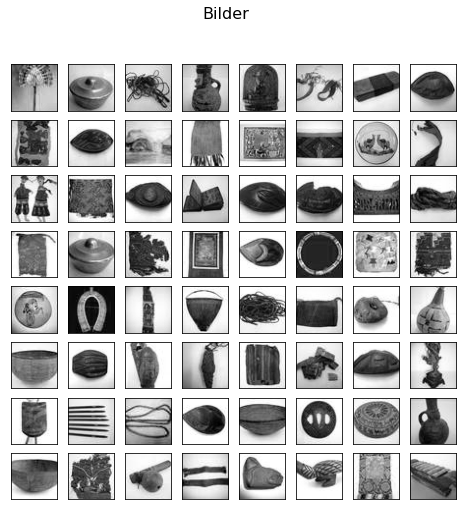

In [73]:
path = "/content/data/img_acute"
image_paths = load.all_abs_paths_in_dir(path)[:64];
nImages = len(image_paths)

acute_images = np.empty( (nImages, 48, 48), "float32")

for idx, image_path in enumerate(image_paths):
  img = load.img_path_to_np_array(image_path)
  img = convert.rgb_to_grayscale(img)
  acute_images[idx] = img

show.show_images_from_np_array(acute_images, "Bilder")

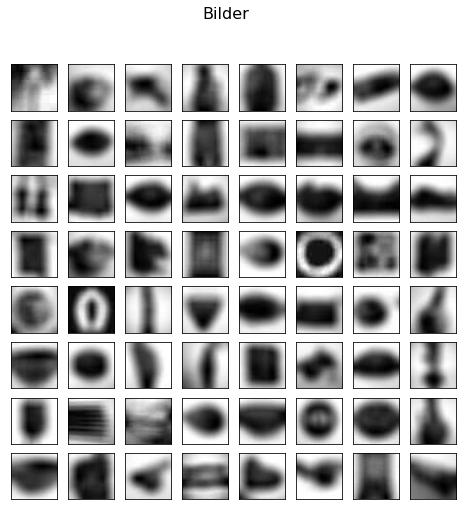

In [74]:
path = "/content/data/img_blurred"
image_paths = load.all_abs_paths_in_dir(path)[:64];
nImages = len(image_paths)

blurred_images = np.empty( (nImages, 48, 48), "float32")

for idx, image_path in enumerate(image_paths):
  img = load.img_path_to_np_array(image_path)
  img = convert.rgb_to_grayscale(img)
  blurred_images[idx] = img

show.show_images_from_np_array(blurred_images, "Bilder")

In [75]:
from keras.layers import Conv2D, Reshape, Lambda, Add

input_shape = (48, 48)
output_shape = (48, 48)

input_layer = Input(shape=input_shape)

x = Reshape((48, 48, 1))(input_layer)

x_kernel = Conv2D(name="x_kernel", filters=1, padding = "same", kernel_size=(3,3))(x)

y_kernel = Conv2D(name="y_kernel", filters=1, padding = "same", kernel_size=(3,3))(x)

x_quad = Lambda(lambda n : n*n)(x_kernel)

y_quad = Lambda(lambda n : n*n)(y_kernel)

x_and_y = Add()([x_quad, y_quad])

x = Reshape((48, 48)) (x_and_y)

output_layer = x

edge_detect = Model(input_layer, output_layer)

x_kernel_weights = np.array([1,0,-1,2,0,-2,1,0,-1])
x_kernel_weights = x_kernel_weights.reshape((3, 3, 1, 1))
x_kernel_weights = [x_kernel_weights, np.array([0])]
edge_detect.get_layer("x_kernel").set_weights(x_kernel_weights)

y_kernel_weights = np.array([1,2,1,0,0,0,-1,-2,-1])
y_kernel_weights = y_kernel_weights.reshape((3, 3, 1, 1))
y_kernel_weights = [y_kernel_weights, np.array([0])]
edge_detect.get_layer("y_kernel").set_weights(y_kernel_weights)

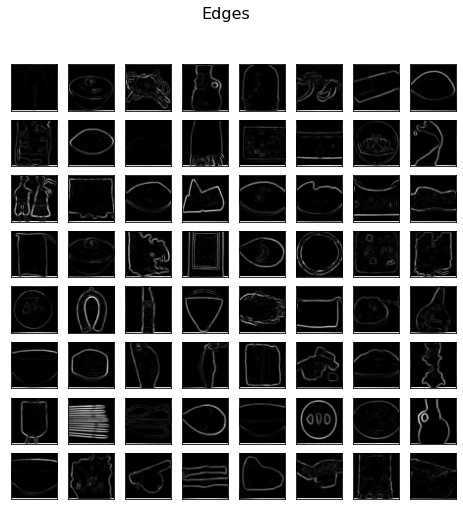

In [78]:
prediction_acute = edge_detect.predict(acute_images)
show.show_images_from_np_array(prediction_acute, "Edges")

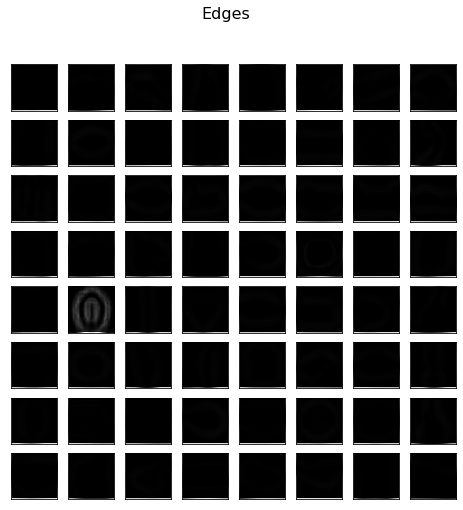

In [79]:
prediction_blurred = edge_detect.predict(blurred_images)
show.show_images_from_np_array(prediction_blurred, "Edges")